In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
font = {'family' : 'monospace',
        'weight' : 'regular',
        'size'   : 16}

matplotlib.rc('font', **font) 
config['user'].get('matplot', {})['2D_settings']['cmap']='inferno'

<IPython.core.display.Javascript object>

Initializing imports
Initializing functions
Initializing data
Initializing analysis


C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\matplotlib\__init__.py:1398: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Initializing plotting
Initialization complete


# Set 1

## Tuning

<IPython.core.display.Javascript object>


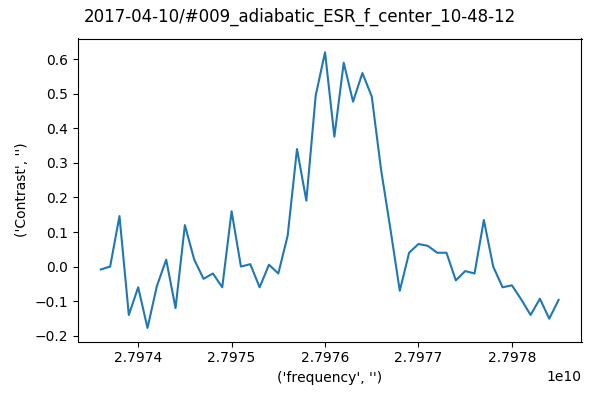

In [6]:
data = qc.load_data('2017-04-10/#009_adiabatic_ESR_f_center_10-48-12')
qc.MatPlot(data.contrast)

<IPython.core.display.Javascript object>


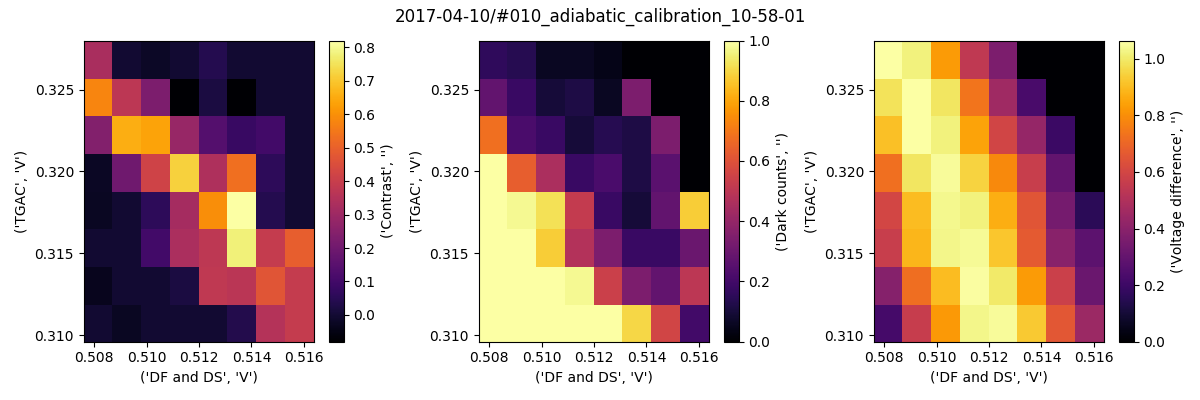

In [2]:
data = qc.load_data('2017-04-10/#010_adiabatic_calibration_10-58-01')
CalibrationPlot(data)

TGAC(0.3175) 
DF_DS(0.51358) 
freq = 27.9762e9

## T1 scans

<IPython.core.display.Javascript object>


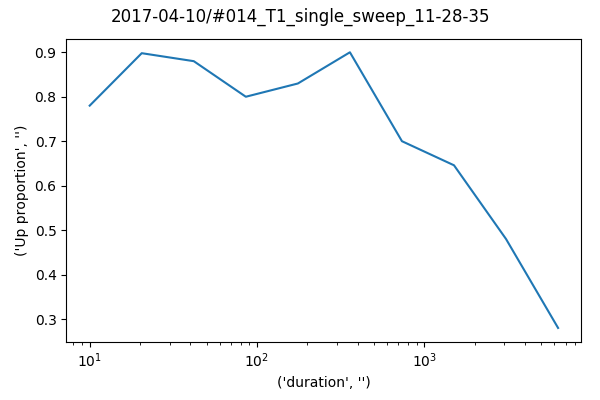

In [11]:
data =  qc.load_data('2017-04-10/#014_T1_single_sweep_11-28-35')
plot = qc.MatPlot(data.up_proportion)
plot[0].set_xscale('log')

<IPython.core.display.Javascript object>


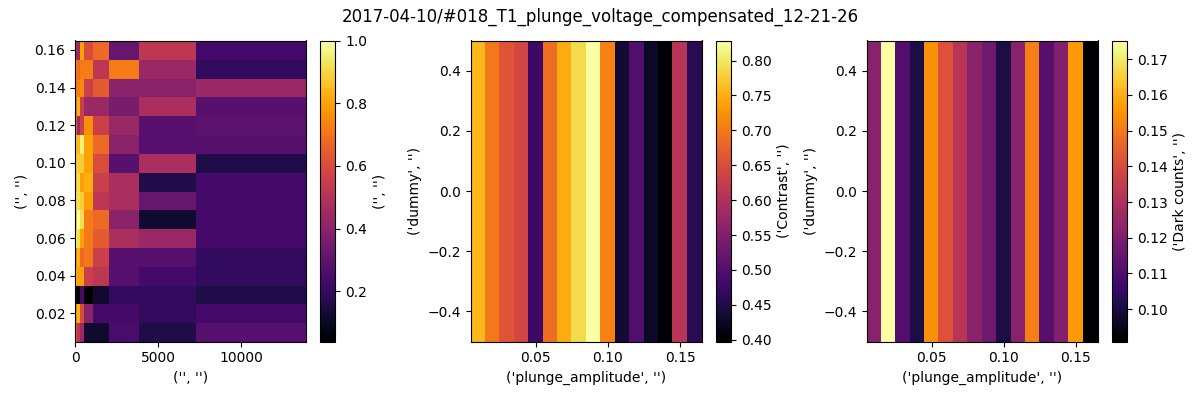

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [38]:
data = qc.load_data('2017-04-10/#018_T1_plunge_voltage_compensated_12-21-26')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.plunge_amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


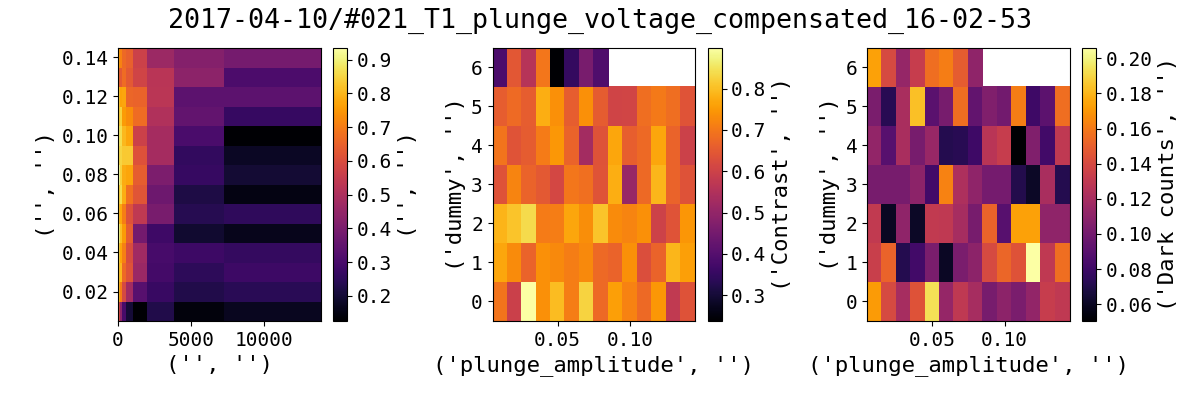

In [18]:
data = qc.load_data('2017-04-10/#021_T1_plunge_voltage_compensated_16-02-53')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.plunge_amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


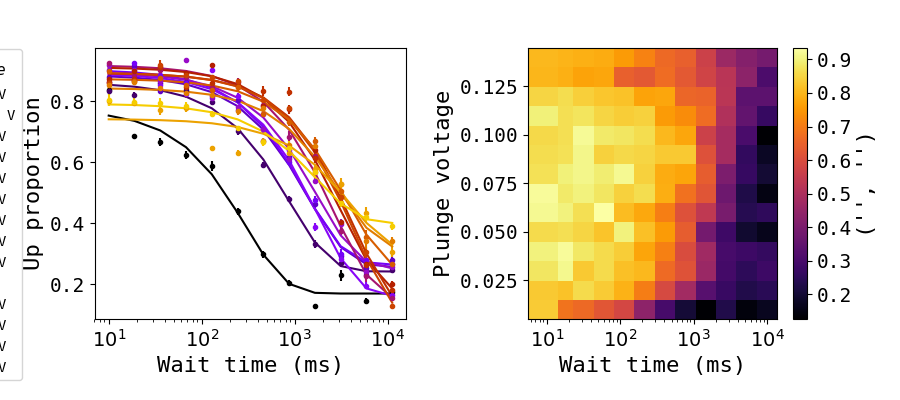

Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 7
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6
Number of successful sweeps: 6


In [16]:
#purple point T1 plunge depenedence
T1_analysis = T1_Analysis('2017-04-10/#021_T1_plunge_voltage_compensated_16-02-53', T1_label='up_proportion', analyse=False)
data = T1_analysis.dataset

plot = qc.MatPlot(subplots=2)

T1_wait_times = data.duration_set[0][0]
plunge_amplitudes = data.plunge_amplitude_set[0]
up_proportions = np.nanmean(data.up_proportion, 0)
num_not_nan = np.sum(~np.isnan(data.up_proportion), 0)
std = np.nanstd(data.up_proportion, 0) / num_not_nan
purple_T1 = []
purple_T1_std = []
for k, up_proportion in enumerate(up_proportions):
    T1_analysis.analyse_data(T1_data=T1_analysis.dataset.up_proportion[:,k],
                             T1_wait_times=T1_wait_times)
    line, = plot[0].plot(T1_analysis.T1_wait_times, T1_analysis.fit_result.best_fit, color=plt.cm.gnuplot(k/len(up_proportions)))
    plot[0].errorbar(T1_wait_times, up_proportion, yerr=std[k], fmt='o', ms=3, color=line._color,
                     label=r'${:3.2}$s - {} V'.format(T1_analysis.T1/1e3,
                                                      plunge_amplitudes[k]))
    purple_T1.append(T1_analysis.T1)
    purple_T1_std.append(T1_analysis.T1_std)
    
plot[0].set_xscale('log')
legend=plot[0].legend(handlelength=1, title=r'$T_1 - V_{plunge}$', fontsize=10, bbox_to_anchor=(-0.21, 1.02))
plot[0].set_xlabel('Wait time (ms)')
plot[0].set_ylabel('Up proportion')

plot[1].add(np.nanmean(data.up_proportion, 0),
            x=data.duration_set[0],
            y=data.plunge_amplitude_set[0])
plot[1].set_xlabel('Wait time (ms)')
plot[1].set_ylabel('Plunge voltage')
plot[1].set_xscale('log')

plot.tight_layout()
art = []
art.append(legend)
plt.savefig(
    "plungedepexample1.png", additional_artists=art,
    bbox_inches="tight")

## Change in tuning

<IPython.core.display.Javascript object>


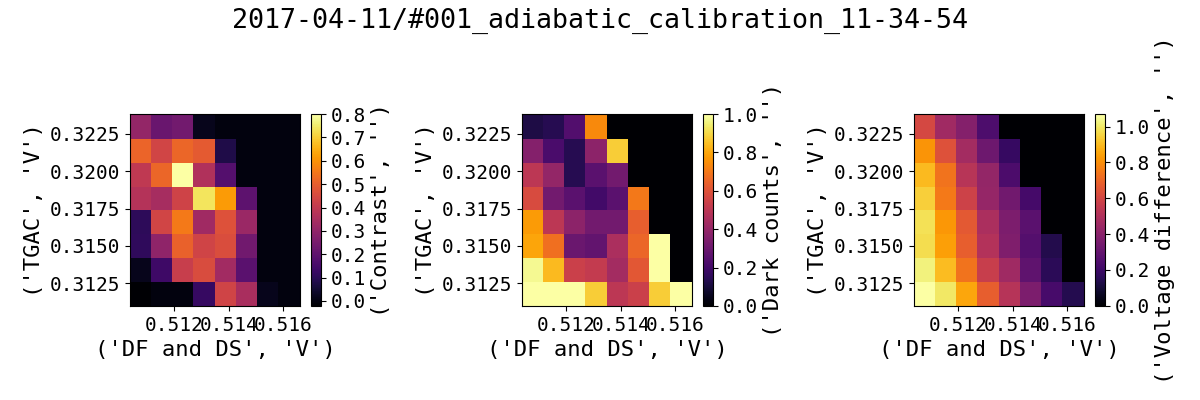

In [19]:
data = qc.load_data('2017-04-11/#001_adiabatic_calibration_11-34-54')
CalibrationPlot(data)

TGAC(0.319813) 
DF_DS(0.512315) 

## T1 scans 2

<IPython.core.display.Javascript object>


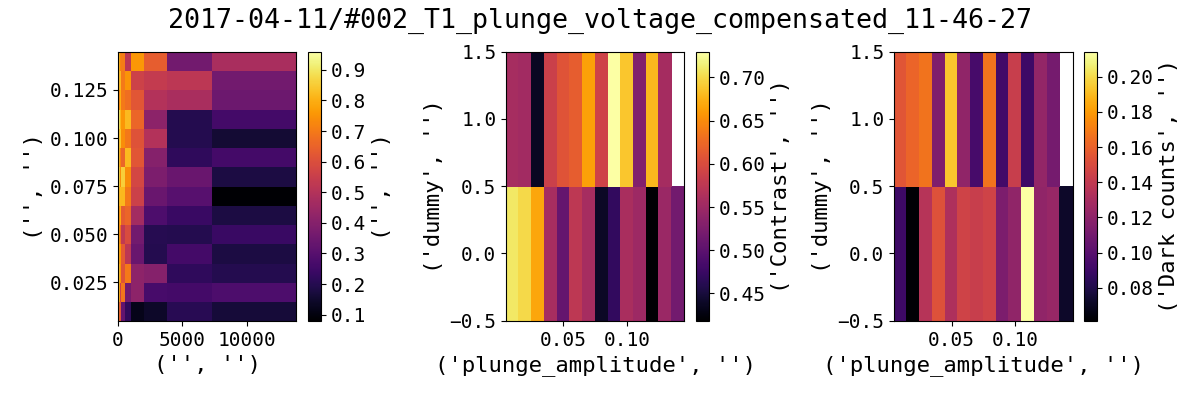

In [42]:
data = qc.load_data('2017-04-11/#002_T1_plunge_voltage_compensated_11-46-27')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.plunge_amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


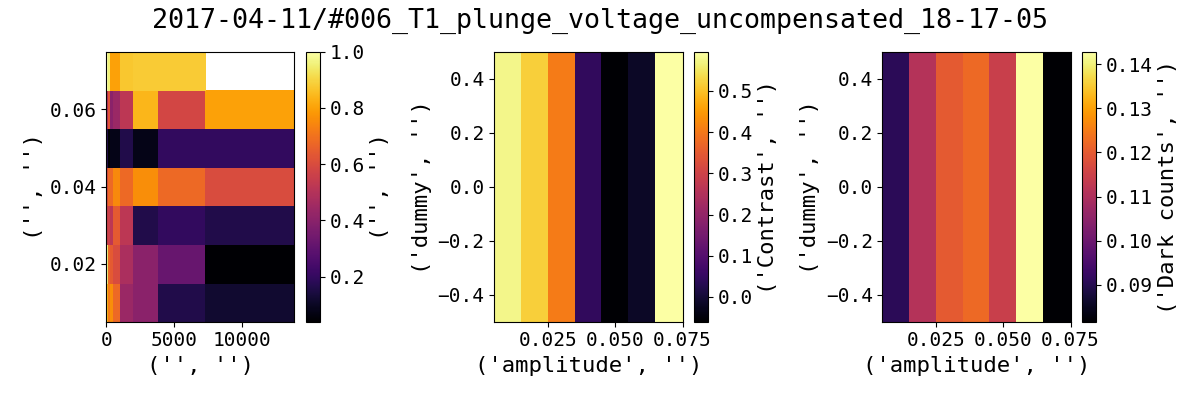

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [50]:
data = qc.load_data('2017-04-11/#006_T1_plunge_voltage_uncompensated_18-17-05')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


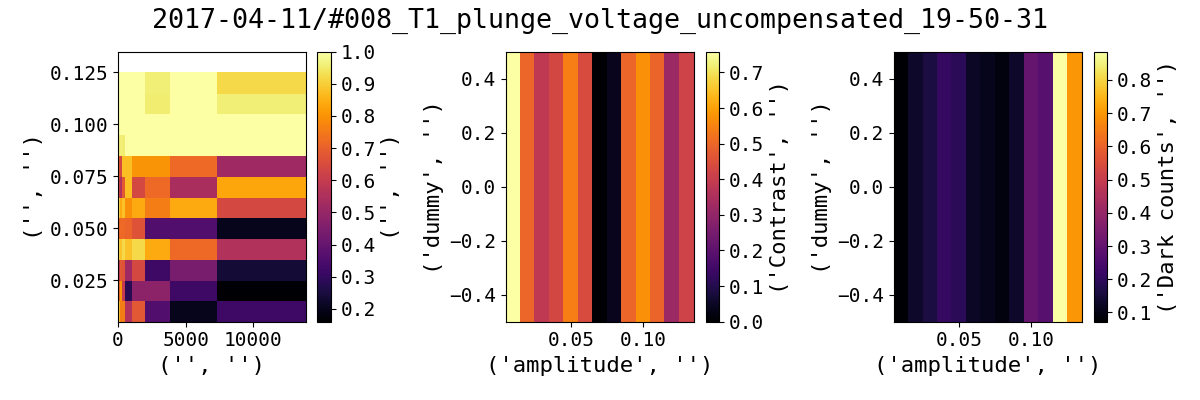

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [53]:
data = qc.load_data('2017-04-11/#008_T1_plunge_voltage_uncompensated_19-50-31')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

<IPython.core.display.Javascript object>


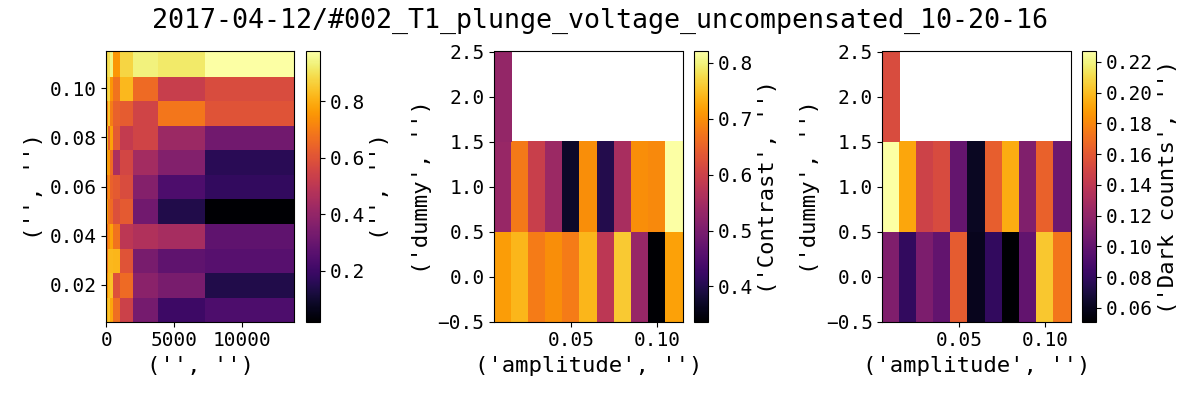

In [64]:
data = qc.load_data('2017-04-12/#002_T1_plunge_voltage_uncompensated_10-20-16')
T1_wait_times = list(np.logspace(1, 4.05, num=12, base=10))
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(T1_wait_times,data.amplitude_set[0], np.nanmean(data.up_proportion, 0),subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts_0_0, subplot=2)

# T1 scans 3 (Serwan)

DataSet:
   mode     = DataMode.LOCAL
   location = '2017-04-13/#032_T1_plunge_voltage_combined_16-02-57'
   <Type>   | <array_id>                      | <array.name>              | <array.shape>
   Measured | optimal_set_vals_0_0_1          | optimal_set_vals          | (100, 11, 2)
   Measured | voltage_difference_0_2_2        | voltage_difference        | (100, 11)
   Setpoint | index0_set_0_0                  | index0                    | (100, 11, 2)
   Setpoint | amplitude_set_0                 | amplitude                 | (100, 11)
   Measured | dark_counts_0_2_1               | dark_counts               | (100, 11)
   Measured | num_traces_0_3_0_1              | num_traces                | (100, 11, 12)
   Setpoint | duration_set_0_3                | duration                  | (100, 11, 12)
   Measured | adiabatic_acquisition_ESR_0_0_2 | adiabatic_acquisition_ESR | (100, 11)
   Setpoint | dummy_set                       | dummy                     | (100,)
   Measured | contr

<IPython.core.display.Javascript object>


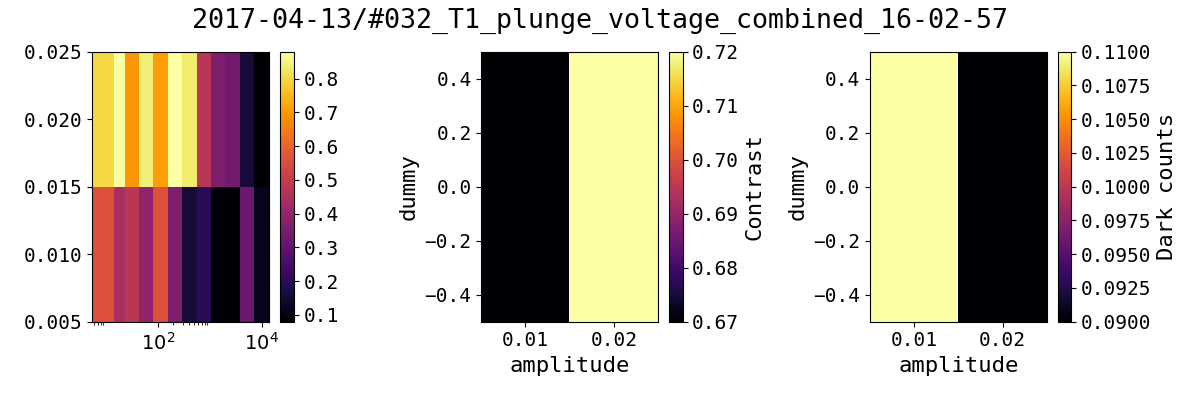

C:\Users\lab.BluG12Meas\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [17]:
data = qc.load_data('2017-04-13/#032_T1_plunge_voltage_combined_16-02-57')
T1_wait_times = data.duration_set_0_3[0]
print(data)

plot1 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot1[0].add(T1_wait_times, data.amplitude_set_0[0], 
             np.nanmean(data.up_proportion_0_3_0_0, 0))
plot1[0].set_xscale('log')
plot1[1].add(data.contrast_0_2_0)
plot1[2].add(data.dark_counts_0_1_0)
plot1.tight_layout()

# plot2 = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot2[0].add(T1_wait_times, data.amplitude_set_1[0], 
#              np.nanmean(data.up_proportion_1_3_0_0, 0))
# plot2[1].add(data.contrast_1_2_0)
# plot2[2].add(data.dark_counts_1_1_0)
# plot2.tight_layout()